# 1. Compréhension des données : Analyse des données d'entraînement

Dans cette partie, nous allons réaliser les opérations d'affichage manuellement pour avoir une vue d'ensemble sur les données

## a) Imports

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import scipy.io
#import warnings
from sklearn.decomposition import PCA

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

Nous avons besoin d'utiliser différentes librairies :
- numpy pour effectuer tous les calculs matriciels rapidement,
- matplotlib pour afficher les résultats de nos courbes,
- pandas pour récupérer ou sauvegarder les données d'un fichier CSV,
- sklearn pour utiliser tous les outils disponibles pour l'exploration et l'analyse des données.

## b) Chargement des données :

In [112]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# charge value
Train = train_df.values
Test = test_df.values

# charge value to train model
X = (Train[:,1:])
Y = (Train[:,0])

Pour charger les données, nous utilisons la fonctions prédéfinis read_csv présentes dans la librairies de Pandas permettant de créer une variable de type Dataframe correspondant à un tableau possédant différents types chargés automatiquement.

Dans les variables Train et Test, nous mettons les valeurs des dataframes précédemment chargés.

Puis, dans la variable X et Y, nous ajoutons les données du fichier d'entrainement en retirant bien l'entête du fichier.
- La variable X permet d'avoir chaque image.
- La variable Y permet d'avoir chaque chiffre correspondant à la précédente image.

## c) Préparation des données

Nous récupérons dans un premier temps le schéma des données, présent dans le document d'entraînement "train.csv" :

In [113]:
print(train_df.columns.values)

['label' 'pixel0' 'pixel1' 'pixel2' 'pixel3' 'pixel4' 'pixel5' 'pixel6'
 'pixel7' 'pixel8' 'pixel9' 'pixel10' 'pixel11' 'pixel12' 'pixel13'
 'pixel14' 'pixel15' 'pixel16' 'pixel17' 'pixel18' 'pixel19' 'pixel20'
 'pixel21' 'pixel22' 'pixel23' 'pixel24' 'pixel25' 'pixel26' 'pixel27'
 'pixel28' 'pixel29' 'pixel30' 'pixel31' 'pixel32' 'pixel33' 'pixel34'
 'pixel35' 'pixel36' 'pixel37' 'pixel38' 'pixel39' 'pixel40' 'pixel41'
 'pixel42' 'pixel43' 'pixel44' 'pixel45' 'pixel46' 'pixel47' 'pixel48'
 'pixel49' 'pixel50' 'pixel51' 'pixel52' 'pixel53' 'pixel54' 'pixel55'
 'pixel56' 'pixel57' 'pixel58' 'pixel59' 'pixel60' 'pixel61' 'pixel62'
 'pixel63' 'pixel64' 'pixel65' 'pixel66' 'pixel67' 'pixel68' 'pixel69'
 'pixel70' 'pixel71' 'pixel72' 'pixel73' 'pixel74' 'pixel75' 'pixel76'
 'pixel77' 'pixel78' 'pixel79' 'pixel80' 'pixel81' 'pixel82' 'pixel83'
 'pixel84' 'pixel85' 'pixel86' 'pixel87' 'pixel88' 'pixel89' 'pixel90'
 'pixel91' 'pixel92' 'pixel93' 'pixel94' 'pixel95' 'pixel96' 'pixel97'
 'pixel9

Cette commande nous indique qu'il y a en tout 785 colonnes :

- La première colonne correspond à la colonne des étiquettes,
- Les autres colonnes correspondent à la suite des valeurs des pixels de chaque image.

Ainsi, chaque ligne du fichier, à l'exception de la première qui correspond au schéma présenté ci-dessus, représente une image par la suite des valeurs de ses pixels. Les images font donc 784 pixels chacune.

Le premier élément de la ligne est l'étiquette, ici c'est un nombre qui correspond au digit (nombre) que représente l'image.

Nous allons donc réaliser du __Machine Learning supervisé__.

#### Visualisation et description générale des données :

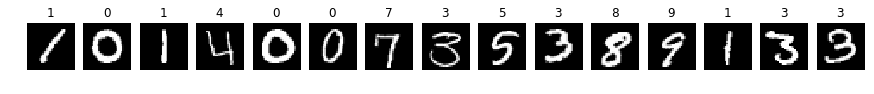

In [114]:
fig1, ax1 = plt.subplots(1,15, figsize=(15,10))
for i in range(15):
    ax1[i].imshow(X[i].reshape((28,28)), cmap='gray')
    ax1[i].axis('off')
    ax1[i].set_title(Y[i])

Nous allons afficher nos 15 premières lignes du fichier train. Le but de cette manoeuvre est de vérifier que notre fichier d'entrainement possède les bonnes données.

Nous constatons que chaque chiffre correspond à son image, nous pouvons passer à la suite de la préparation des données.

In [115]:
# Prévisualisation des données
print(train_df.head())

# Description des données
print(train_df.info())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

On peut voir que l'objet pandas qui a servi au chargement des données, retourne un objet de type Data Frame.
Cette commande nous indique également qu'il y a 42000 lignes :

- Comme dit précédemment, la première correspond à l'étiquette,
- Les 41999 autres lignes sont les images.

Les valeurs stockées sont toutes des entiers.

Les 785 colonnes contiennent toutes des valeurs catégoriques (à l'exception de la première ligne qui contient les noms des colonnes).

#### Les données présentent-elles des trous ou des valeurs non entières ?

In [116]:
def containsOnlyIntegerValues(matrix):

	for line in range(len(matrix)):
		for col in range(len(matrix[0])):
			try :
				int(matrix[line][col])
			except :
				return False

	return True

matrix = train_df.values.tolist()
print(containsOnlyIntegerValues(matrix))

True


Cette fonction nous apprend que nos données sont correctement formées et toutes la valeurs sont bien des entiers.

Cette étape est indispensable pour la préparation des données. Avoir des données fiables permet d'obtenir un taux de prédiction important.

En exécutant cette fonction, nous obtenons la valeur true, il n'y a donc pas de valeur manquante.

#### Étudions maintenant la plage de données de chaque colonne :

In [117]:
def getColumnsRange(matrix):

	output = []

	for col in range(len(matrix[0])):
		colRange = []
		for line in range(len(matrix)):
			value = matrix[line][col]
			if not (value in colRange):
				colRange.append(value)
			colRange.sort()

		output.append(colRange)

	return output

print(train_df.describe())
print(getColumnsRange(matrix))

              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8    ...         pixel774      pixel775  \
count  42000.0  42000.0  42000.0    ...     42000.000000  42000.000000   
mean       0.0      0.0      0.0    ...         0.219286      0.117095   
std        0.0      0.0      0.0    ...         6.312890      4.633819   
min       

On observe ainsi que la première colonne, la colonne des étiquettes prend les valeurs suivantes : de 0 à 9

Et les autres colonnes prennent les valeurs suivantes :  de 0 à 255
Cela confirme donc que les données contiennent des images représentant les chiffres 0, 1, 2, ..., 9
En d'autre terme une image représente bien un unique chiffre et ce chiffre peut être un 0, un 1, ... ou un 9.
De plus, les images sont représentées en niveaux de gris et sont codées sur 8 bits.

Enfin, on peut également observer que des colonnes ne possèdent que très peu de valeurs, voir qu'une seule (pixel noir). Cela signifie que nos images ont des portions communes qui sont identiques (les chiffres sont entourés de couleur noire dans chaque image. Nous verrons par la suite s'il est intéressant d'enlever ces colonnes.

## d) Analyse des données

#### Étudions maintenant la distribution des données :

Digit : 1	11.152380952380952%
Digit : 0	9.838095238095239%
Digit : 4	9.695238095238095%
Digit : 7	10.478571428571428%
Digit : 3	10.35952380952381%
Digit : 5	9.035714285714286%
Digit : 8	9.673809523809524%
Digit : 9	9.971428571428572%
Digit : 2	9.945238095238095%
Digit : 6	9.85%


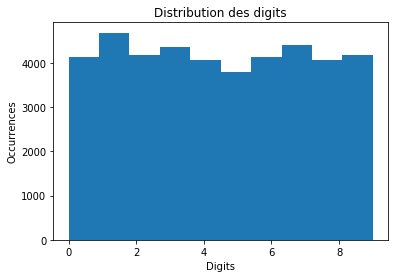

In [118]:
def getDigitDistribution(matrix):
	
	dict = {}
	numberOfLines = len(matrix)

	for line in range(numberOfLines):
		value = matrix[line][0]

		if value in dict:
			occurrences = dict[value]
			occurrences += 1
			dict[value] = occurrences

		else:
			dict[value] = 1

	for value in dict:
		occurrences = dict[value]
		percentage = (occurrences * 100) / numberOfLines
		dict[value] = percentage

	return dict

dict = getDigitDistribution(matrix)

for i in dict:
	print("Digit : " + str(i) + "\t" + str(dict[i]) + "%")

plt.hist(Y, )
plt.title("Distribution des digits")
plt.xlabel("Digits")
plt.ylabel("Occurrences")
plt.show()


On observe ainsi que les données sont réparties dans les bonnes proportions : il y a quasiment autant de 0 que de 1 que de 2.

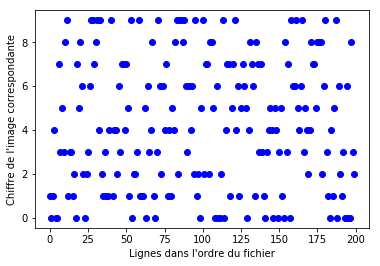

In [119]:
def getDitributionAxes(matrix, numberOfLines):

	x = []
	y = []

	for i in range(numberOfLines):
		x.append(i)
		y.append(matrix[i][0])

	return (x, y)

# on affiche seulement les 200 premières valeurs pour avoir un meilleur affichage
x, y = getDitributionAxes(matrix, 200)

plt.plot(x, y, "bo")
plt.xlabel("Lignes dans l'ordre du fichier")
plt.ylabel("Chiffre de l'image correspondante")
plt.show()

De plus, les images sont mélangées selon une loi uniforme : en traçant un graphe avec les digits dans l'ordre du fichier, on observe bien un nuage de points. Ceci est important pour l'évaluation du modèle : par exemple, si le modèle apprend sur 200 lignes et que ces 200 lignes sont composées à 50% du digit 0, 50% du digit 1, alors si on teste sur d'autres lignes qui ne contiennent que des digits 2 et 4 par exemple, alors notre modèle sera testé sur des valeurs qu'il n'a jamais vu et on fera une évaluation totalement fausse.

Autre exemple : si nos données sont composées à 80% du digit 0, alors l'évaluation des données de test reviendra à une probabilité : on aura environ 80% de digits 0 identifiés.

#### Représentation de la variance

On souhaite maintenant analyser la variance de chaque colonne de nos données. La variance permet ainsi de mesurer le nombre d'informations de chaque colonne on va s'intéresser au nombre d'occurrences de chaque variance trouvée.

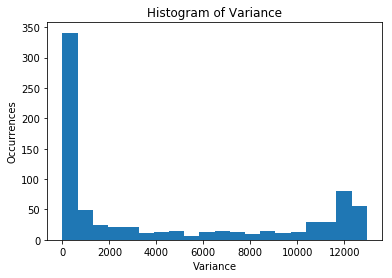

In [120]:
variance_hist = np.var(X, axis = 0)
plt.hist(variance_hist, 20)
plt.title("Histogram of Variance")
plt.xlabel("Variance")
plt.ylabel("Occurrences")
plt.show()

On constate alors que la grande majorité des colonnes ne contient que très peu d'informations. En effet, la plupart des variances trouvées sont proches de 0. Il sera donc utile de s'interroger s'il ne serait pas efficace de supprimer ces colonnes peu informatives pour gagner en temps de calcul.

#### Visualisation de toutes les données

L'utilité de la réduction de dimensionnalité peut ne pas être entièrement évidente dans deux dimensions seulement, mais devient beaucoup plus claire lorsque l'on regarde des données de grande dimension. Dans notre cas nous sommes en dimension 784, cela est donc difficile de visualiser nos données dans l'ensemble. L'utilité de PCA dans un premier temps est de nous permettre de retourner en dimension 2 pour visualiser nos données. 

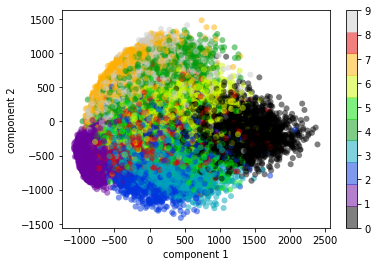

In [121]:
pca_vizualise = PCA(2)  # project from 64 to 2 dimensions
projected = pca_vizualise.fit_transform(X)

plt.scatter(projected[:, 0], projected[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()



L'ensemble des données est un nuage de points de 784 dimensions, et ces points sont la projection de chaque point de données le long des directions présentant la variance la plus grande. Pour l'essentiel, nous avons trouvé l'étirement et la rotation optimaux dans un espace à 784 dimensions qui nous permet de voir la disposition des chiffres en deux dimensions, et ce, de manière non supervisée, c'est-à-dire sans référence aux étiquettes.

# 2. Réduction des données en utilisant PCA

Une des applications les plus importantes de la PCA est d’accélérer les algorithmes d’apprentissage automatique. Pour cela, nous faisons l'hypothèse que le nombre de colonnes, c'est à dire le nombre de dimensions, peut être réduit. En effet, comme nous avons pu le constater précédemment avec la variance, un grand nombre de colonnes ne présente que très peu d'informations.

In [122]:
from sklearn.decomposition import PCA
# ## Removing the column with variance 0
variance = np.var(X, axis = 0)>1000
print(variance.shape)
X = X[:, variance]
Test = Test[:,variance]
print(X.shape)
# ##Calculate Principal Components
pca = PCA()
pca.fit(X)

(784,)
(42000, 412)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Nous avons calculé la variance en utilisant la fonction var() de la librairie numpy. Nous obtenons les variances de chaque pixel dans la variable variance.

Nous mettons alors cette variance dans la variable X pour appeler la fonction PCA(). La fonction fit() permet d'utiliser X sur la fonction PCA précédemment définie.

#### a. Tracé de la variance expliquée par rapport à la variance des composants.
Ce graphe va nous aider à choisir le nombre de composants pour entraîner nos données.

Une partie vitale de PCA est d’estimer le nombre de composants nécessaire à la description des données pour l’utilisation concrète de PCA. Ceci peut être déterminé en examinant le ratio de variance expliquée cumulative en fonction du nombre de composants:

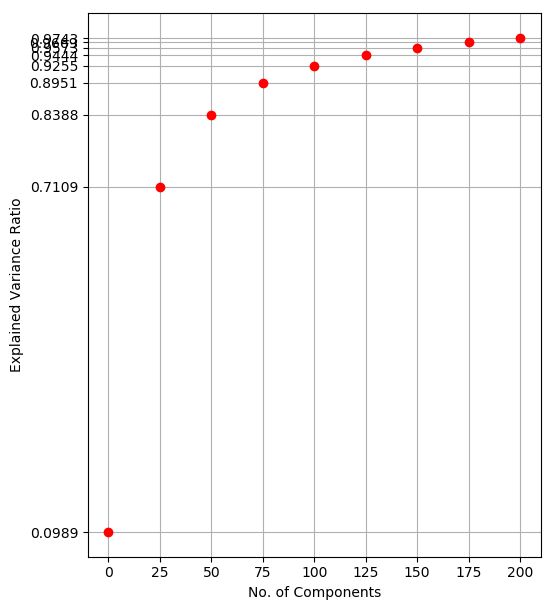

In [37]:

explained_variance = pca.explained_variance_ratio_
# ##Calculate cumulative explained ration
cum_explained_variance = [np.sum(explained_variance[:i+1]) for i in range (0, 201, 25)]
X_axis = [i for i in range(0, 201,25)]

##Plot Graph
fig = plt.figure(figsize = (5.841, 7.195), dpi=100)
plt.plot(X_axis, cum_explained_variance, 'ro')
plt.grid(True, which = 'both')
plt.yticks(cum_explained_variance)
plt.xticks(X_axis)
plt.ylabel("Explained Variance Ratio")
plt.xlabel("No. of Components")
plt.show()

Cette courbe quantifie la part de la variance totale à 784 dimensions contenue dans les N premières composantes. Par exemple, nous voyons qu'avec les chiffres, les 25 premiers composants contiennent environ 75% de la variance, alors qu'il nous faut environ 175 composants pour décrire près de 100% de la variance.

Nous voyons ici que notre projection bidimensionnelle perd beaucoup d’informations (mesurée par la variance expliquée) et qu’il nous faudrait environ 75 composantes pour conserver 90% de la variance. L'analyse de ce graphique pour rechercher un jeu de données de grande dimensions aide à comprendre le niveau de redondance présent dans plusieurs observations.

### Découpage de nos données pour l'entraînement et le test
- Partie d'entraînement: 80%
- Partie de test: 20%

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size  = 0.20, random_state  = 0)

La fonction train_test_split de la librairie sklearn permet d'obtenir nos données d'entrainements mélangés dans de nouvelles variables. Nous avons fixé le paramètre test_size à 0.20 pour obtenir la partie de test à 20% des données. C'est ce qui est le plus usuel à choisir pour une proposer train/test de nos données.

### Fonction de normalisation et fonction PrincipalComponents pour retourner les n composants principaux

In [123]:

def normalize(sigma2, mean2, X):
    X = (X-mean2)/sigma2
    return X

def PolynomialFeatures1(X):
    X_2 = np.square(X)
    X = np.column_stack((X, X_2))
    return X

J1 = []
J2 = []

##Take n principal components
def PrincipalComponents(n):
    pca = PCA(n_components= n)
    X_train1 = pca.fit_transform(X_train)
    X_test1 = pca.transform(X_test)
    return X_train1, X_test1

## Logistic Regression

def LogisticRegression(X_train2, y_train2, X_test2, y_test2, penalty):
    print("penalty= ", penalty)
    regr = linear_model.LogisticRegression(solver='lbfgs',max_iter=1000, C=penalty)
    regr.fit(X_train2, y_train2)
    score1 = regr.score(X_train2, y_train2)
    score2 = regr.score(X_test2, y_test2)
    print(score1, score2)
    Prediction = regr.predict(X_test2)
    return score1, score2, Prediction



### Validation croisée

Pour tester nos différentes variantes de la régression logistique, nous nous bason sur la méthode de validation croisée. 

Dans une phase d'apprentissage, le processus d'adaptation optimise les paramètres du modèle pour qu'il s'adapte au mieux aux données d'apprentissage. Si nous prenons ensuite un échantillon indépendant de données de validation provenant de la même population que les données de formation, il s'avèrera généralement que le modèle ne correspond pas aux données de validation autant qu'il convient aux données de formation. La taille de cette différence risque d'être importante, en particulier lorsque la taille de l'ensemble de données d'apprentissage est petite ou lorsque le nombre de paramètres dans le modèle est grand. La validation croisée est un moyen d'estimer la taille de cet effet.

Manque d'expliquer clairement c'est quoi la validation croisé mdr

In [137]:
def validate(X_train1, y_train, X_test1, y_test):
    J1 = []
    J2 = []
    P = []
    C = []

    for i in range(20000, X_train1.shape[0], 1500):
        score1, score2, Prediction = LogisticRegression(X_train1[:i+1,:], y_train[:i+1, ], 
                                                        X_test1[:i+1,:], y_test[:i+1], 0.1)
        J1.append(1-score1)
        J2.append(1-score2)
        P = Prediction
        cm = metrics.confusion_matrix(y_test, P)
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        C.append([cm_normalized])

    C_mean = C.pop()[0]
    for i in range(0,9):
        C_mean = C_mean + C.pop()[0]
    C_mean = C_mean/10.0

    return (J1, J2, C_mean)



**D'habitude une variance de 0.8 est suffisante pour résumer la variance des données. Dans un premier temps nous partirons dans un premier temps avec les N premiers composants de PCA pour expliquer 0.8 de la variance.**

penalty=  0.1
0.891455427229 0.895357142857
8400
penalty=  0.1
0.893214269104 0.895595238095
8400
penalty=  0.1
0.893308986566 0.895238095238
8400
penalty=  0.1
0.892575813232 0.895595238095
8400
penalty=  0.1
0.892657974693 0.895833333333
8400
penalty=  0.1
0.892367550271 0.895
8400
penalty=  0.1
0.892693355402 0.895952380952
8400
penalty=  0.1
0.892069112488 0.895119047619
8400
penalty=  0.1
0.892378363176 0.895476190476
8400
penalty=  0.1
0.892003223784 0.895714285714
8400


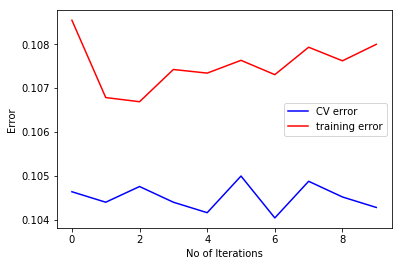

In [139]:
X_train1, X_test1 = PrincipalComponents(0.8)   # Getting principal components

J1, J2, C_mean = validate(X_train1, y_train, X_test1, y_test)

plt.plot(J2, 'b-', label = "CV error")
plt.plot(J1, 'r-', label ="training error")
plt.legend()
plt.ylabel("Error")
plt.xlabel("No of Iterations")
plt.show()







Nous avons le taux d'erreur par itération, mais pour une avoir une idée plus précise de notre algorithme nous pouvons utiliser la matrice de confusion. 

La matrice de confusion est un outil servant à mesurer la qualité d'un système de classification.

Chaque colonne de la matrice représente le nombre d'occurrences d'une classe estimée, tandis que chaque ligne représente le nombre d'occurrences d'une classe réelle. Par classe nous parlons des labels 0 à 9. Ainsi nous pouvons voir précisément quels sont les digits les mieux reconnus et ceux pour quoi nous n'obtenons pas un bon score.

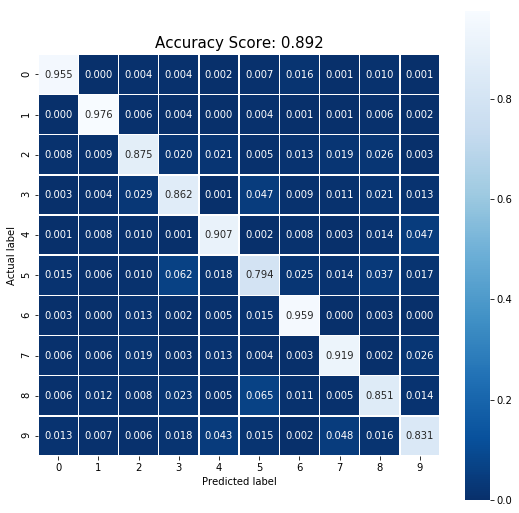

In [140]:

plt.figure(figsize=(9,9))
sns.heatmap(C_mean, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(1 - sum(J1)/10) 
plt.title(all_sample_title, size = 15);



Nous remarquons que le digit est le moins bien reconnus des classes, cela peut s'expliquer par la proportion de chaque classe dans nos données de bases. En effet dans la visualisation des datas, nous avons vu que nous avions moins de chiffres repréentant un 5. Cela signifie que notre algorithme d'apprentissage supervisé apprendra sur moins de 5 que pour d'autres digits. 

- En revenant sur la courbe du taux d'erreur, nous pouvons voir que nous avons une courbe particulièrement irrégulière et une précision global non satisfaisante. Nous allons augmenter le nombre de composants pour PCA pour passer à 0.9 de la variance expliquée. 

penalty=  0.1
0.910604469777 0.908571428571
8400
penalty=  0.1
0.911492488721 0.909047619048
8400
penalty=  0.1
0.911656014956 0.909047619048
8400
penalty=  0.1
0.910860781193 0.907857142857
8400
penalty=  0.1
0.910734202531 0.907142857143
8400
penalty=  0.1
0.910475982692 0.908452380952
8400
penalty=  0.1
0.91014102962 0.908214285714
8400
penalty=  0.1
0.910494737877 0.90880952381
8400
penalty=  0.1
0.910096559483 0.909285714286
8400
penalty=  0.1
0.909763887645 0.908928571429
8400


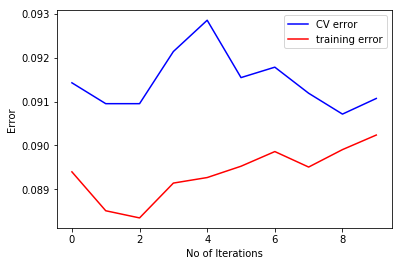

In [141]:
X_train1, X_test1 = PrincipalComponents(0.9)

J1, J2, C_mean = validate(X_train1, y_train, X_test1, y_test)


plt.plot(J2, 'b-', label = "CV error")
plt.plot(J1, 'r-', label ="training error")
plt.legend()
plt.ylabel("Error")
plt.xlabel("No of Iterations")
plt.show()

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(C_mean, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(1 - sum(J1)/10) 
plt.title(all_sample_title, size = 15);



** Nous avons donc fait la logistic régression sur un ensemble de plus grande données pourtant la précision n'a pas autant augmenté. Cela signifie que jouer sur le nombre de composants n'est pas une bonne idée et il faut chercher une autre façon d'améliorer notre algorithme. Nous repartons pour un nombre de composant PCA expliquant 0.8 de la variance en prenant leur polynome de degré 2. **

#### Add polynomial features

##### 1.Logistic Regression

(8400, 43) (33600, 43)
(8400, 989) (33600, 989)
penalty=  0.1
0.999500024999 0.971785714286
8400
penalty=  0.1
0.999395376959 0.972619047619
8400
penalty=  0.1
0.999478283553 0.972142857143
8400
penalty=  0.1
0.999265336109 0.972142857143
8400
penalty=  0.1
0.999192338756 0.973095238095
8400
penalty=  0.1
0.99920002909 0.97369047619
8400
penalty=  0.1
0.999068997621 0.97380952381
8400
penalty=  0.1
0.998852496639 0.974047619048
8400
penalty=  0.1
0.998593793944 0.974523809524
8400
penalty=  0.1
0.998388107818 0.975357142857
8400


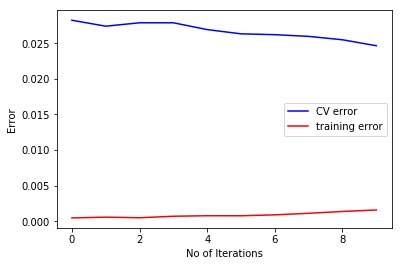

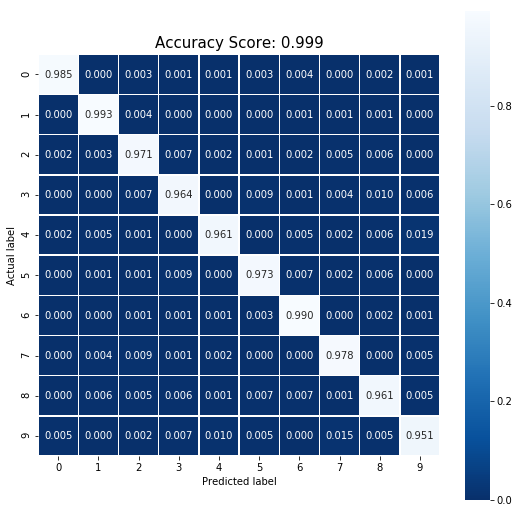

In [136]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias = False)
X_train1, X_test1 = PrincipalComponents(0.81)
print(X_test1.shape, X_train1.shape)

X_train1 = poly.fit_transform(X_train1)
X_test1 = poly.transform(X_test1)

print(X_test1.shape, X_train1.shape)

sigma = np.std(X_train1, axis = 0)
mean = np.mean(X_train1, axis = 0)

X_train1 = normalize(sigma , mean , X_train1)
X_test1 = normalize(sigma , mean, X_test1)


J1, J2, C_mean = validate(X_train1, y_train, X_test1, y_test)


plt.plot(J2, 'b-', label = "CV error")
plt.plot(J1, 'r-', label ="training error")
plt.legend()
plt.ylabel("Error")
plt.xlabel("No of Iterations")
plt.show()

plt.figure(figsize=(9,9))
sns.heatmap(C_mean, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(1 - sum(J2)/10) 
plt.title(all_sample_title, size = 15);




** We got way better accuracy here and is data over  fitting .... may be but since we are getting good result on cross validation data also, It's gud to go with this.**

#### Saving data trained with logistic regression

In [0]:
from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(include_bias = False)

X1 = X.copy()
Test1 = Test.copy()

pca = PCA(n_components= 0.8388)
X1 = pca.fit_transform(X1)
Test1 = pca.transform(Test)

print(X1.shape, Test1.shape)

X1 = poly.fit_transform(X1)
Test1 = poly.fit_transform(Test1)

print(X1.shape, Test1.shape)

sigma = np.std(X1, axis = 0)
mean = np.mean(X1, axis = 0)

X1 = normalize(sigma, mean, X1)
Test1 = normalize(sigma , mean, Test1)
print(X1.shape, Test1.shape)


regr = linear_model.LogisticRegression(solver='lbfgs',max_iter=1000, C=0.1)
regr.fit(X1, Y)
score1 = regr.score(X1, Y)
print(score1)
Prediction = regr.predict(Test1)
image_id = np.arange(1,Prediction.shape[0]+1)
pd.DataFrame({"ImageId": image_id, "Label": Prediction}).to_csv('out_reg1.csv', 
                                                                      index=False, header=True)

#### I submitted the data and got an accuracy of 0.9815. Now we will try to train data with SVM and kernel = 'rbf'. Note we will not use polynomial features with SVM since SVM maps the data in higher dimensions so there is no point in including the polynomial features, also SVM doesn't perform well with too many features.

- So it seems that this model is performin a little bit better, So we will go with it, Let's save the prediction and save it.